#**Projeto de Machine Learning - MBA**

## **Introdução**
####Este trabalho tem como objetivo prever quais clientes de uma empresa de telecomunicações irão dar churn num período de três meses.
####Churn é a perda de um cliente ou cancelamento de serviço pelo cliente por algum motivo, ou seja, é quando o cliente deixa de comprar um produto ou corta o relacionamento com a empresa. A taxa de churn, também conhecida por taxa de rotatividade, é igual a porcentagem de clientes que deixaram a empresa em um determinado período.
####Neste projeto vamos trabalhar com os dados da empresa de telecomunicações Telco, que possui alta taxa de cancelamento de serviço. Os dados foram obtidos em https://www.kaggle.com/datasets/blastchar/telco-customer-churn
####O churn não é interessante para as empresas em geral, por isso é importante analisar este problema com o objetivo de maximizar a receita da empresa e/ou minimizar despesas. O custo de marketing para a empresa adquirir um novo cliente é bem maior do que o custo para se manter um cliente.

## **Questões para Auxiliar no Desenvolvimento do Trabalho**

####**1. Descreva o problema/dor de negócio que você pretende auxiliar desenvolvendo seu modelo.**
####R: A empresa Telco do ramo de Telecomunicação tem tido um problema de perda de clientes insatisfeitos (churn), e busca tanto descobrir as causas dessa insatisfação, como criar uma abordagem preventiva de comunicação com os clientes mais atritados, de forma a evitar que eles percam relacionamento com a empresa.
####**2. Quais dados você tem disponíveis para entender o problema e criar uma solução?**
####R: Clientes que saíram no último mês – a coluna é chamada de Churn
####Serviços nos quais cada cliente se inscreveu: telefone, múltiplas linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes.
####Informações da conta do cliente – há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais.
####Informações demográficas sobre clientes – sexo, faixa etária e se possuem companheiros e dependentes.
####**3. Como você utilizará Machine Learning para auxiliar nesse problema?**
####R: Criarei um modelo de classificação prevendo, a partir dos dados do mês M, se o cliente descontinuará os serviços da empresa nos próximos 3 meses (M+1, M+2, M+3). Este modelo terá alguma medida de importância de variáveis para descobrirmos se há algum produto ou alguma navegação específica no aplicativo que esteja causando insatisfação nos clientes.
####**4. Como o modelo será utilizado no dia-a-dia pela área de negócio?**
#### R: O modelo será executado uma vez por mês.
####**5. Qual a métrica de avaliação que deve ser utilizada para o seu modelo?**
####R: Acurácia, sensibilidade (recall), precisão e f1 – score.



##**1 - Importação e Preparação dos Dados**

In [1]:
#Importação das libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('/content/Telco-Customer-Churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Exibindo o formato do conjunto de dados
churn.shape

(7043, 21)

In [4]:
#Exibindo informações das variáveis
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##**2 - Análise Exploratória dos Dados**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 79.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


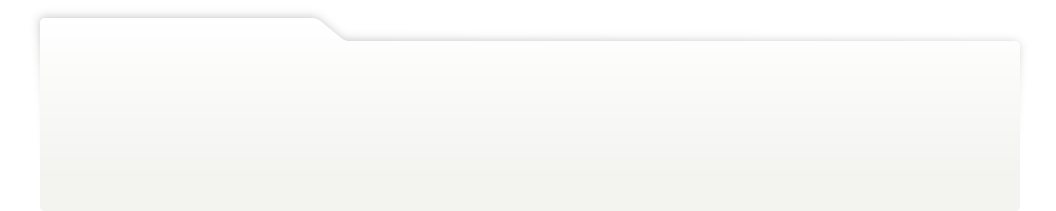
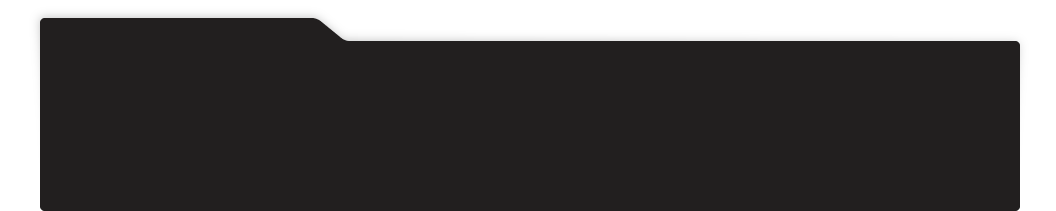
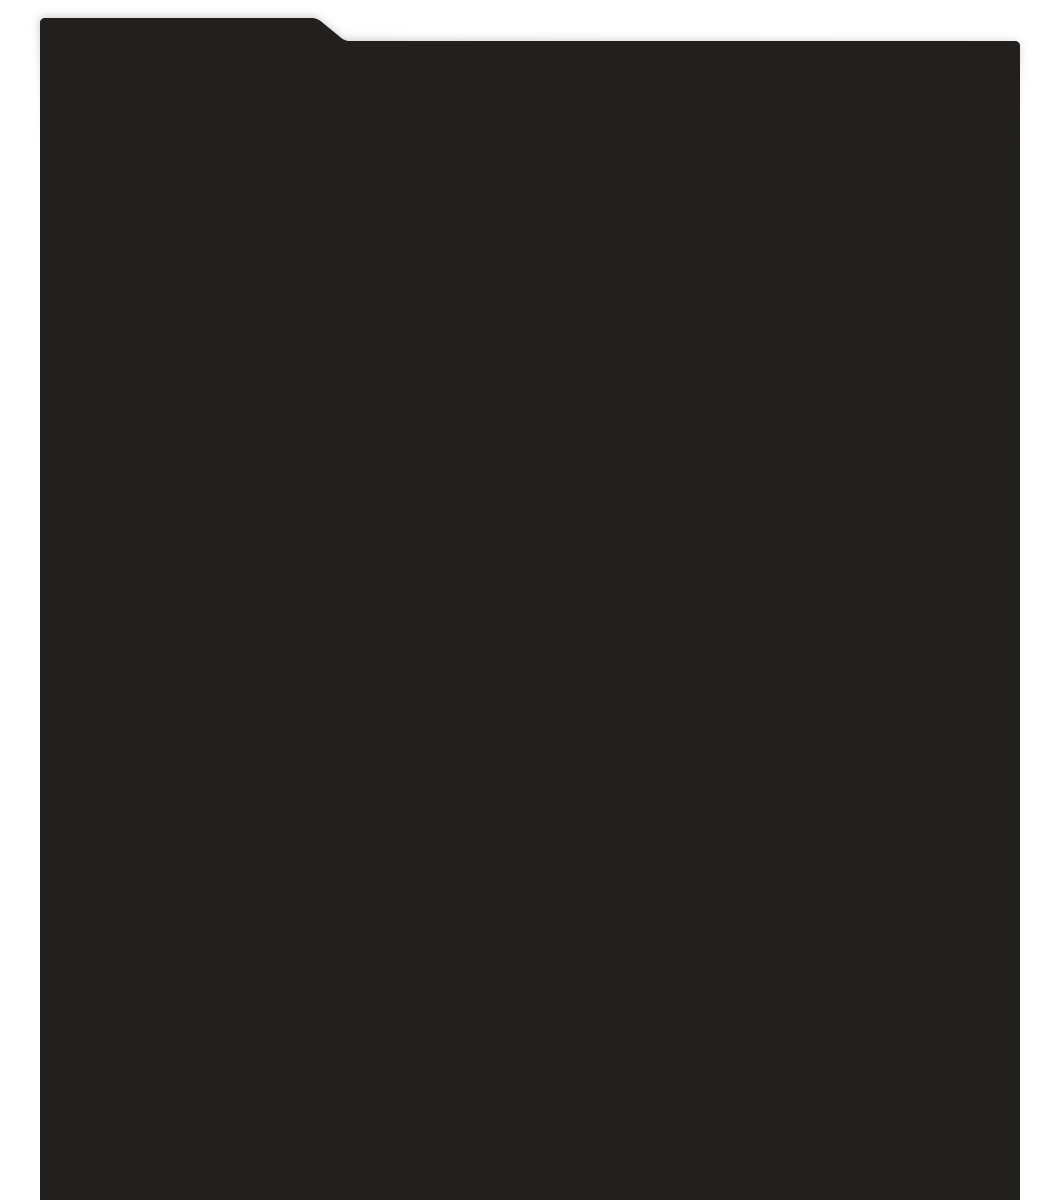
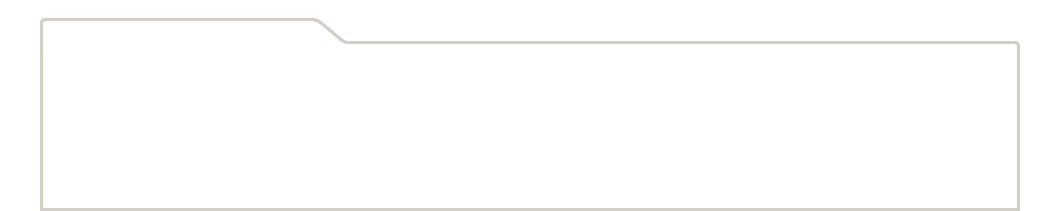
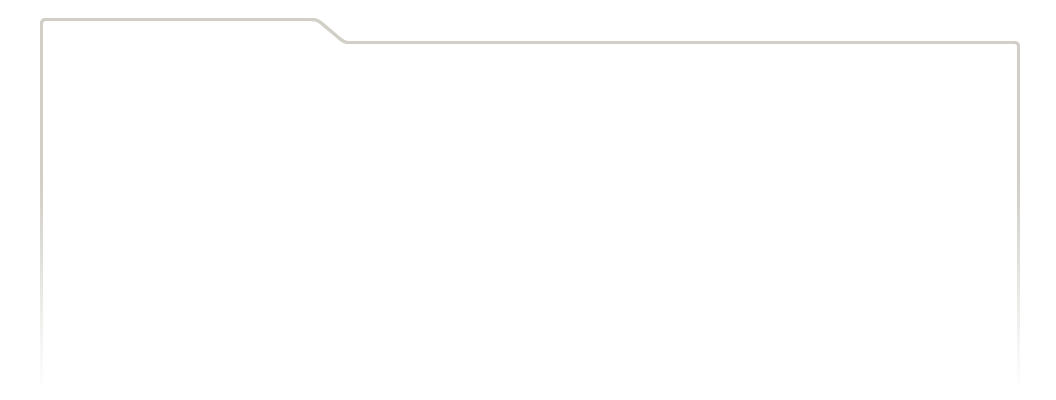
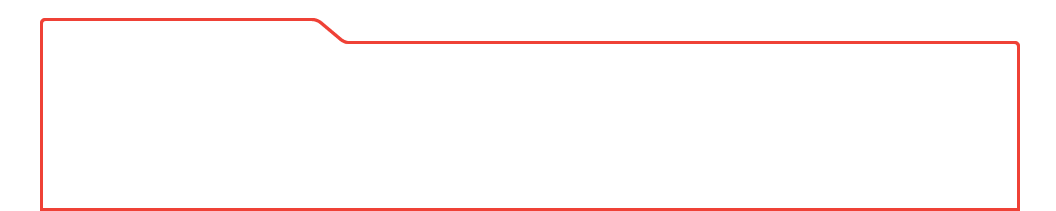
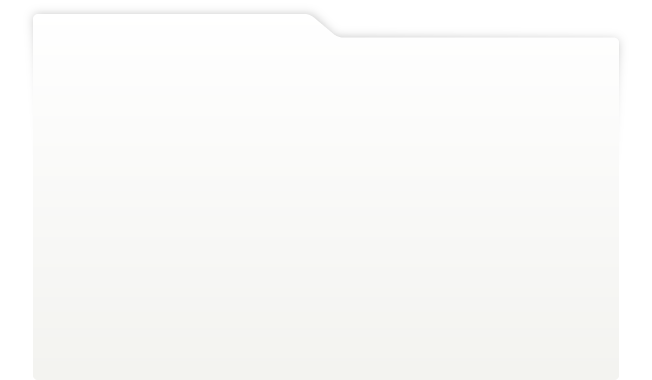
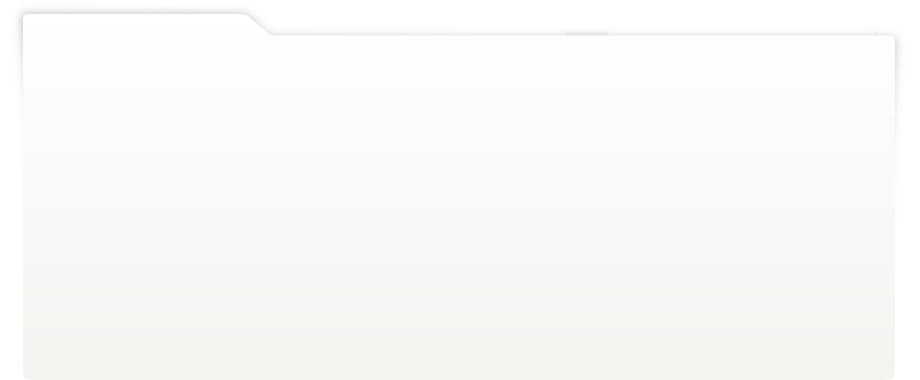
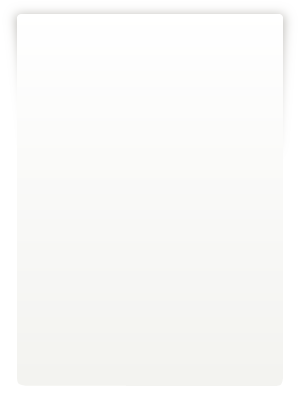
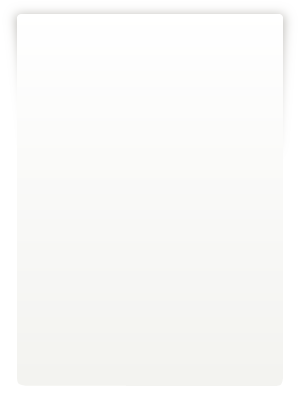
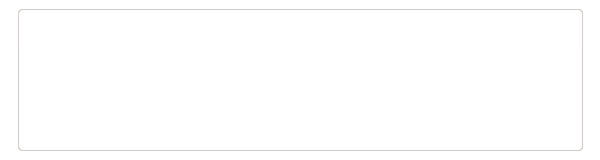
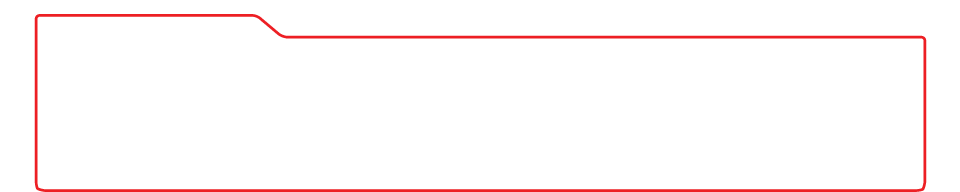
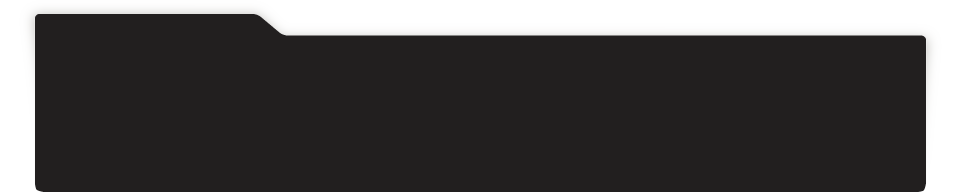
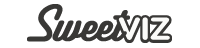
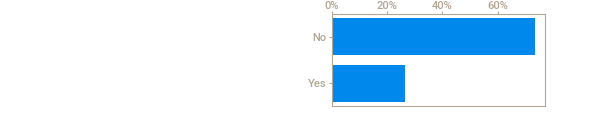
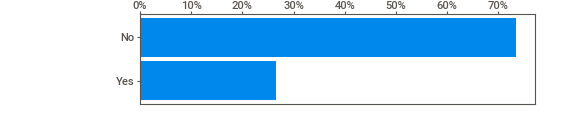
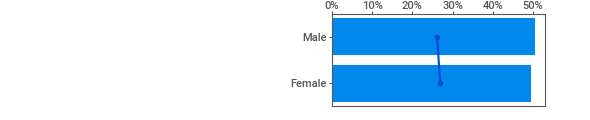
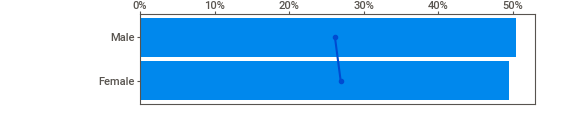
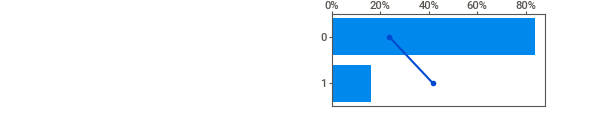
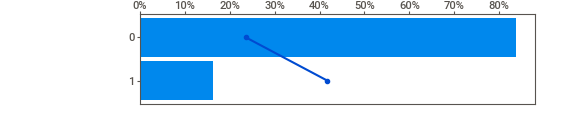
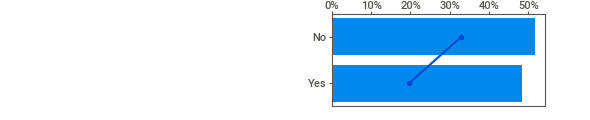
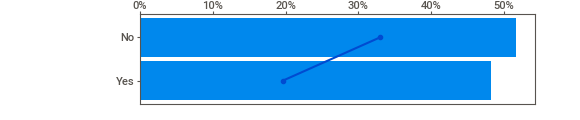
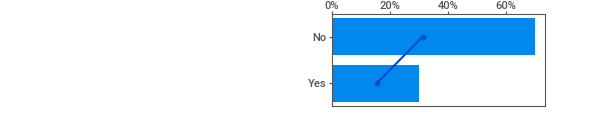
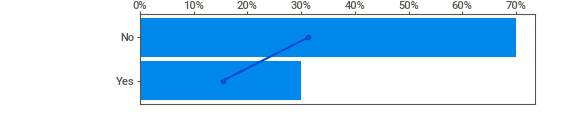
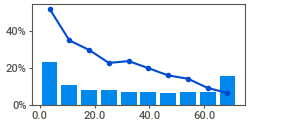
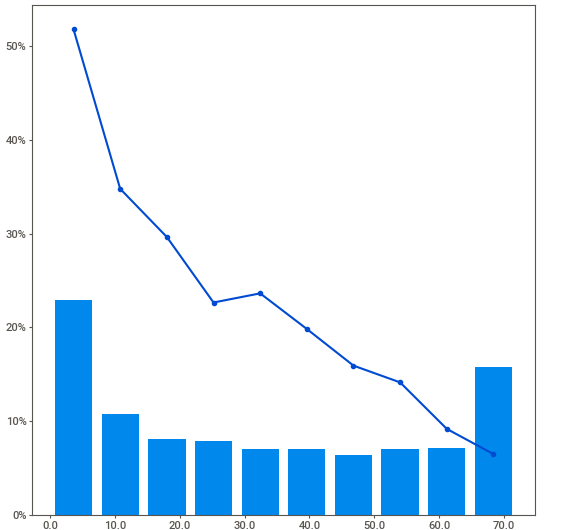
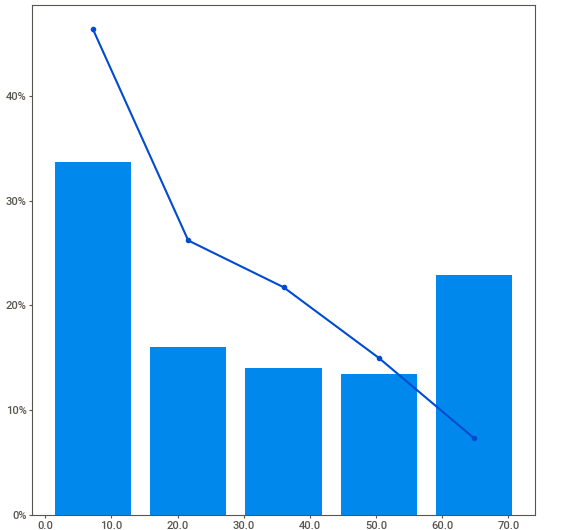
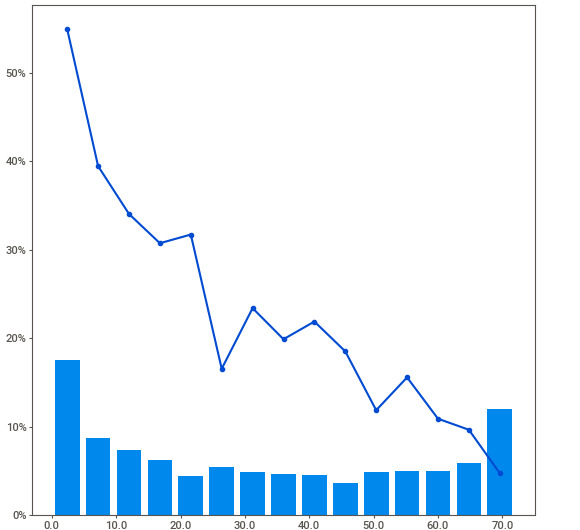
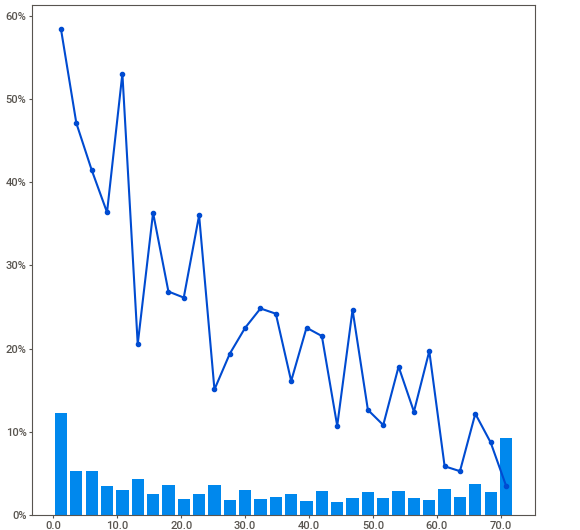
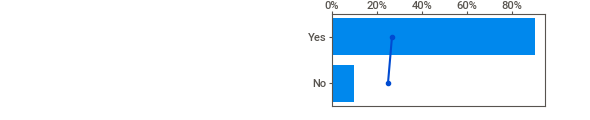
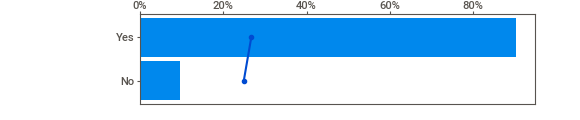
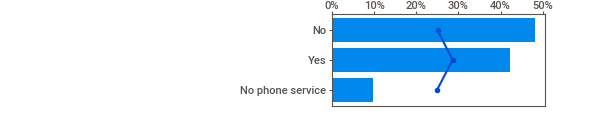
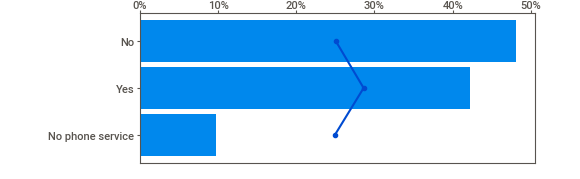
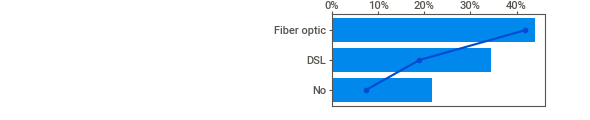
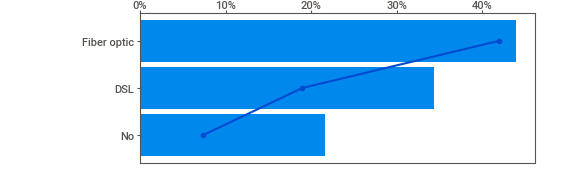
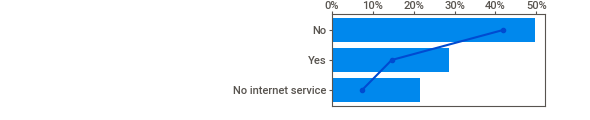
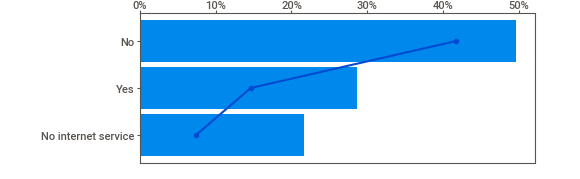
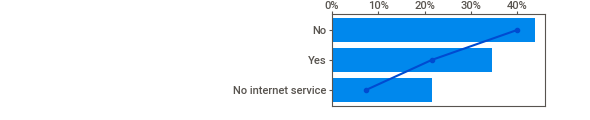
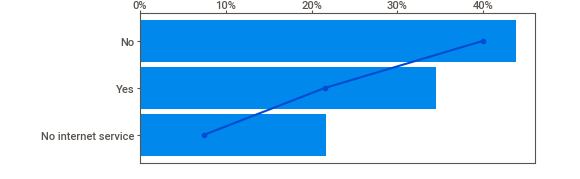
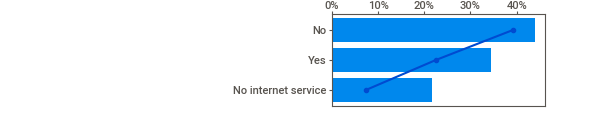
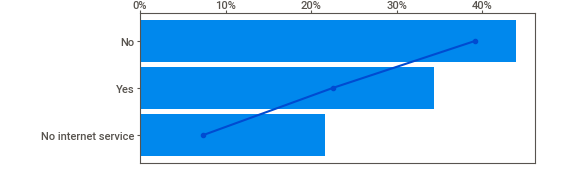
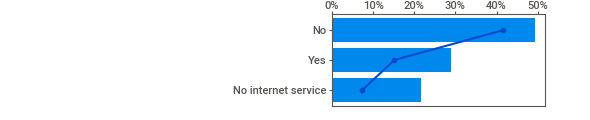
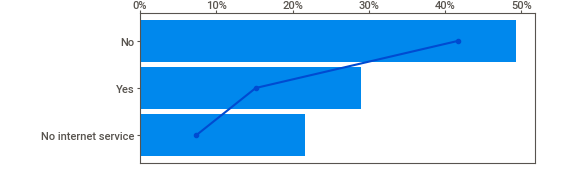
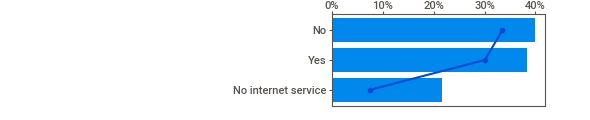
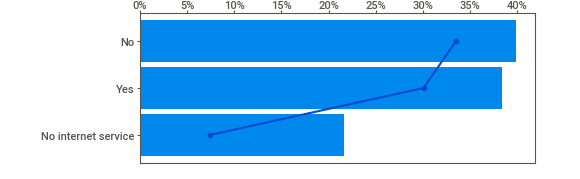
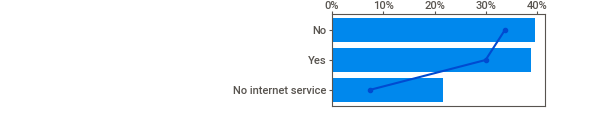
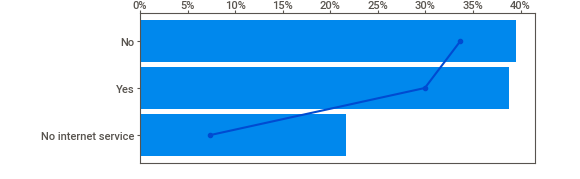
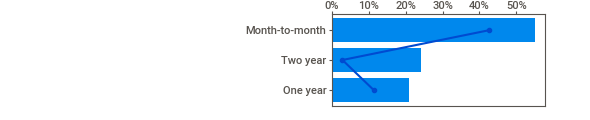
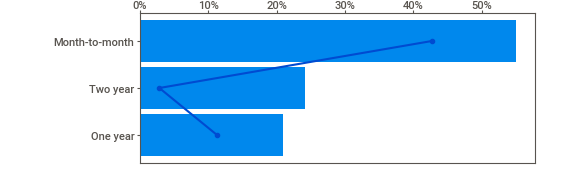
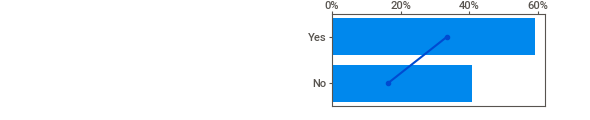
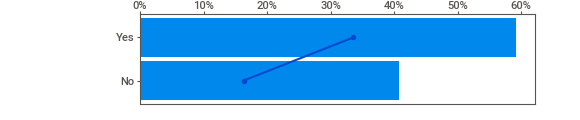
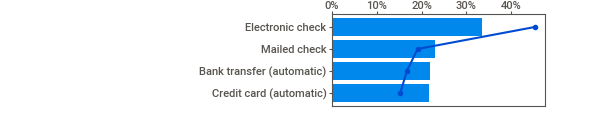
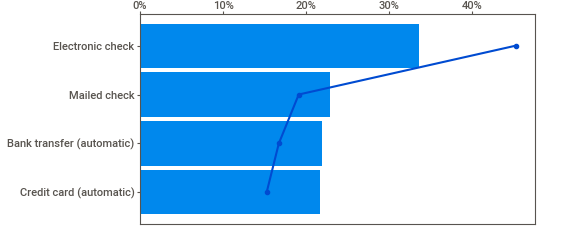
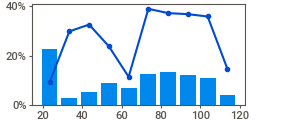
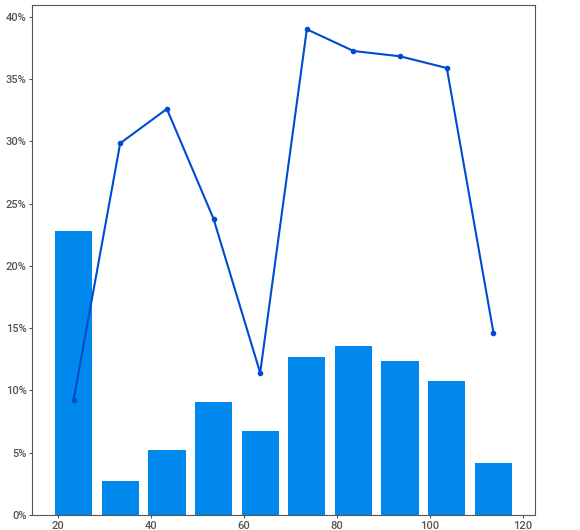
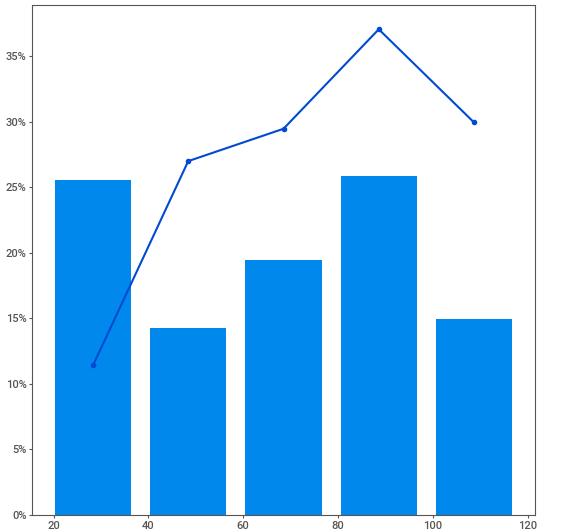
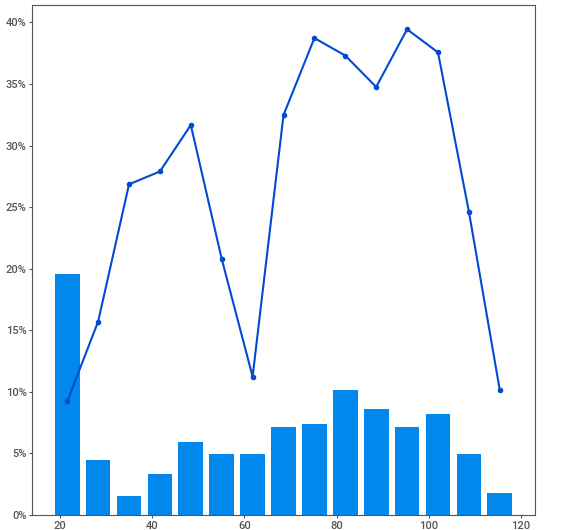
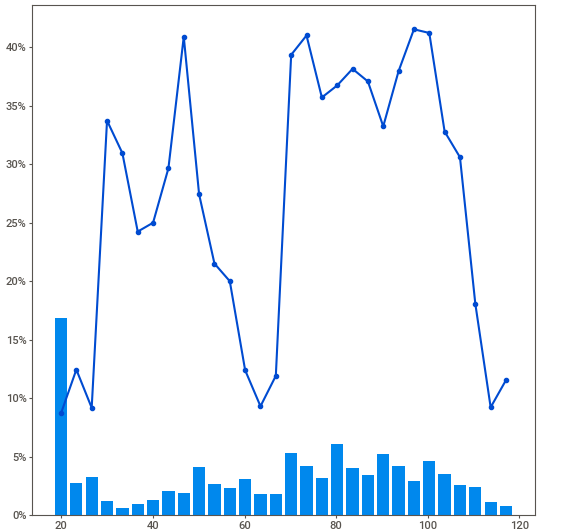
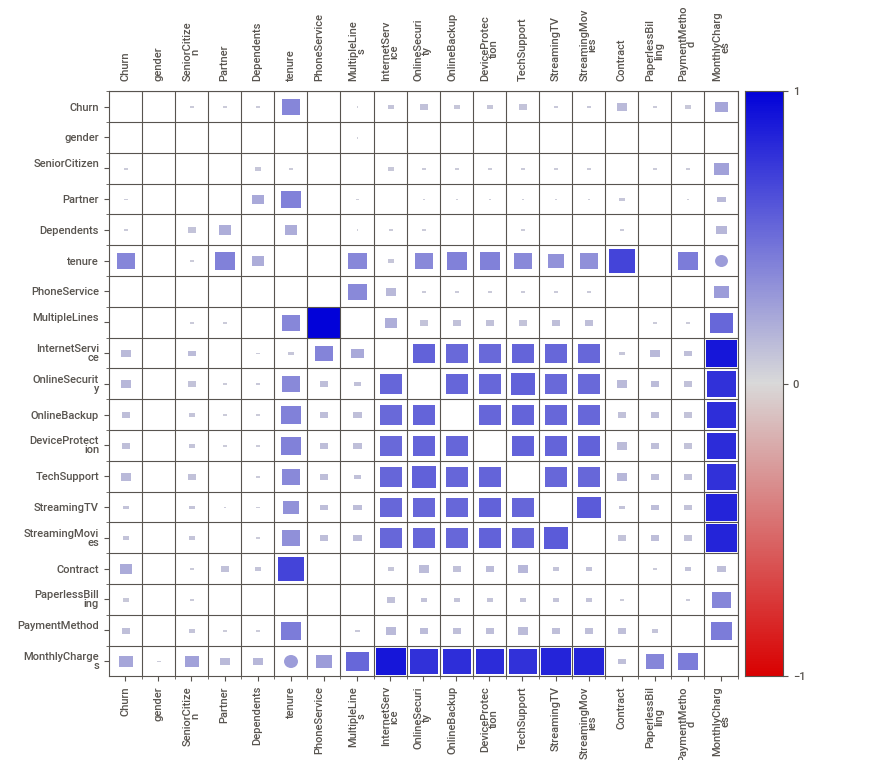
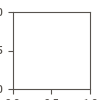

In [5]:
# instalando biblioteca de visualização
!pip install sweetviz
import sweetviz as sv
eda = sv.analyze(source = churn, target_feat = 'Churn')
eda.show_notebook()

##**3 - Pré-processamento para Machine Learning**
Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fiquem adequados para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos).

In [6]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **PP1 - Descarte de variáveis não importantes**

In [7]:
#Atribuindo churn á variável X
X = churn

In [8]:
#Deletando a variável'customerID'
X.drop('customerID', axis=1, inplace=True)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#Convertendo 'TotalCharges' em variável numérica
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors = 'coerce')

In [11]:
#Verificando se a variável 'TotalCharges' foi convertida em numérica
X['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


###**PP2 - Verificação de dados faltantes**

In [12]:
#Verificando a existência de dados faltantes ou valores nulos
X.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Percebemos que a variável TotalCharges contém dados faltantes.

In [13]:
# Fazendo a imputação pela média na coluna 'TotalCharges'.
def imputacao(df):

  media_TotalCharges = df['TotalCharges'].mean()

  def troca_media_TotalCharges(row):
      if pd.isnull(row['TotalCharges']):
          return media_TotalCharges
      else:
          return row['TotalCharges']

  df['TotalCharges'] = df.apply(troca_media_TotalCharges, axis = 1)

  return df

In [14]:
X = imputacao(X)

In [15]:
#Verificando a existência de dados faltantes ou valores nulos novamente e se 'TotalCharges' foi imputada
X['TotalCharges'].isnull().sum()

0

### **PP3 - Remoção de Outliers**

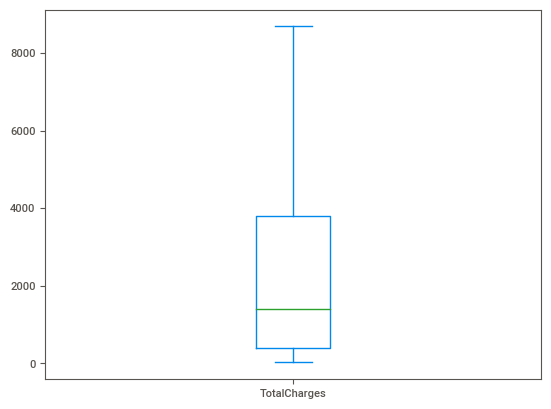

In [16]:
X['TotalCharges'].plot(kind='box');

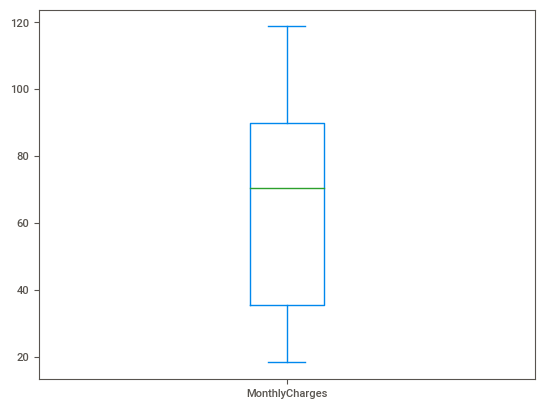

In [17]:
X['MonthlyCharges'].plot(kind='box');

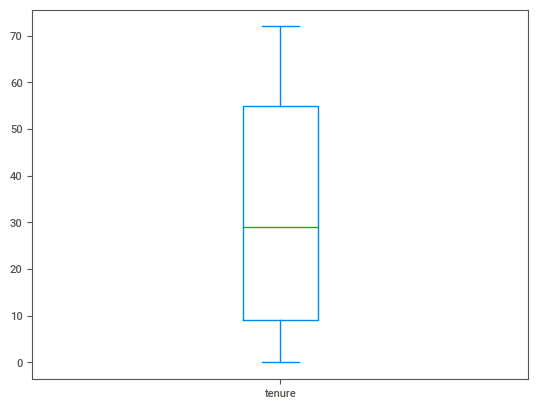

In [18]:
X['tenure'].plot(kind='box');

Nenhuma das três variáveis contínuas possuem outliers

###**PP4 - Categorização de Variáveis Contínuas**

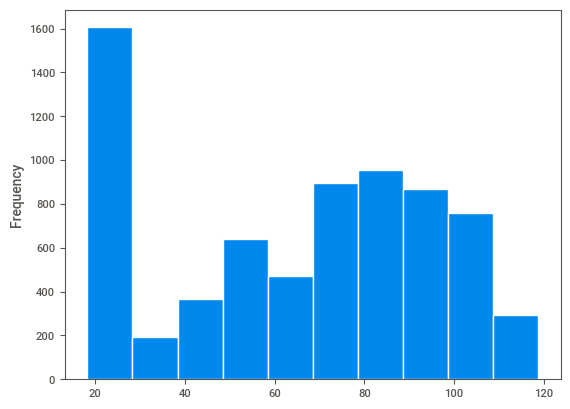

In [19]:
X['MonthlyCharges'].plot(kind='hist', edgecolor='white');

In [20]:
X[X['MonthlyCharges'] > 0]['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

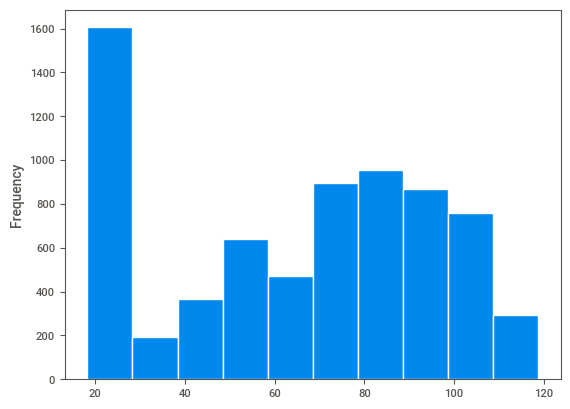

In [21]:
X[X['MonthlyCharges'] > 0]['MonthlyCharges'].plot(kind = 'hist', edgecolor = 'white');

In [22]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 20:
        return 'Até 20'
    elif x < 40:
        return '20 - 60'
    elif x < 60:
        return '60 - 100'
    else:
        return '100+'

X['MonthlyCharges'] = X['MonthlyCharges'].apply(auxiliar)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,20 - 60,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,60 - 100,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,60 - 100,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),60 - 100,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,100+,151.65,Yes


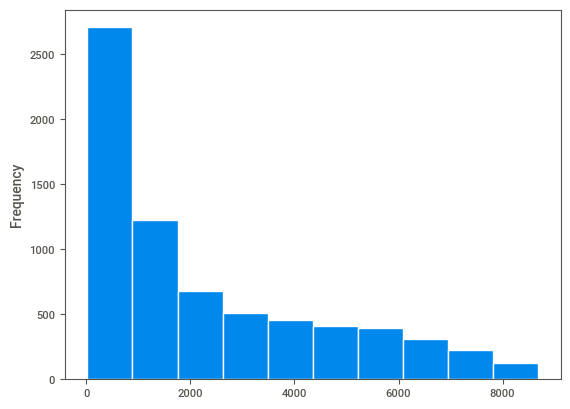

In [23]:
X['TotalCharges'].plot(kind='hist', edgecolor='white');

In [24]:
X[X['TotalCharges'] > 0]['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

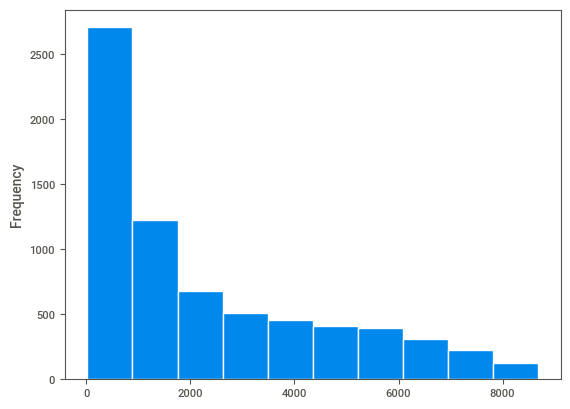

In [25]:
X[X['TotalCharges'] > 0]['TotalCharges'].plot(kind = 'hist', edgecolor = 'white');

In [26]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 2000:
        return 'Até 2000'
    elif x < 4000:
        return '2000 - 4000'
    elif x < 6000:
        return '4000 - 6000'
    else:
        return '6000+'

X['TotalCharges'] = X['TotalCharges'].apply(auxiliar)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,20 - 60,Até 2000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,60 - 100,Até 2000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,60 - 100,Até 2000,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),60 - 100,Até 2000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,100+,Até 2000,Yes


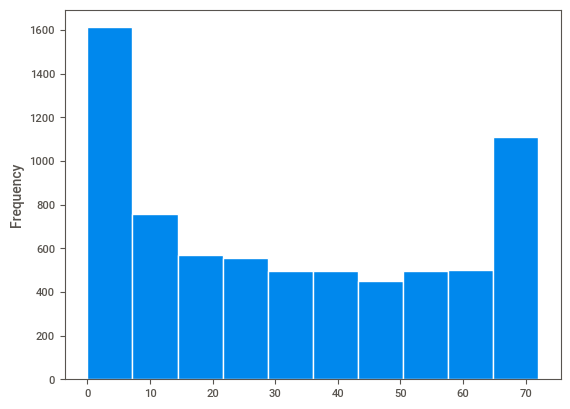

In [27]:
X['tenure'].plot(kind='hist', edgecolor='white');

In [28]:
X[X['tenure'] > 0]['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

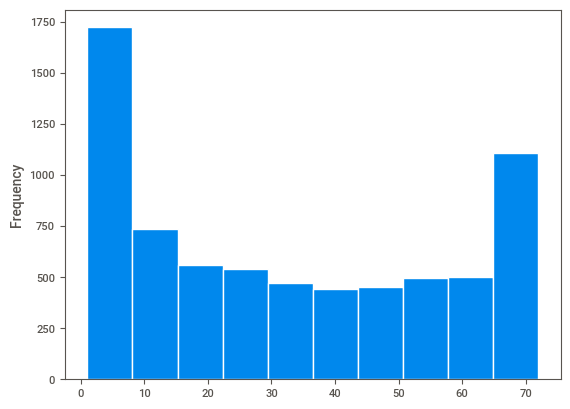

In [29]:
X[X['tenure'] > 0]['tenure'].plot(kind = 'hist', edgecolor = 'white');

In [30]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 12:
        return 'Até 12'
    elif x < 24:
        return '12 - 24'
    elif x < 36:
        return '24 - 36'
    elif x < 48:
        return '36 - 48'
    else:
        return '48+'

X['tenure'] = X['tenure'].apply(auxiliar)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,Até 12,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,20 - 60,Até 2000,No
1,Male,0,No,No,24 - 36,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,60 - 100,Até 2000,No
2,Male,0,No,No,Até 12,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,60 - 100,Até 2000,Yes
3,Male,0,No,No,36 - 48,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),60 - 100,Até 2000,No
4,Female,0,No,No,Até 12,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,100+,Até 2000,Yes


In [31]:
X.shape

(7043, 20)

### **PP5 - Dummyficação de Variáveis**

In [32]:
variaveis_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn','MonthlyCharges','TotalCharges','tenure']


x1 = pd.get_dummies(X, columns = variaveis_cat, drop_first = True)

In [33]:
x1.head(6)

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,MonthlyCharges_60 - 100,MonthlyCharges_Até 20,TotalCharges_4000 - 6000,TotalCharges_6000+,TotalCharges_Até 2000,tenure_24 - 36,tenure_36 - 48,tenure_48+,tenure_Até 12,tenure_Zerada
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
x1.shape

(7043, 39)

In [35]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender_Male                            7043 non-null   uint8
 1   SeniorCitizen_1                        7043 non-null   uint8
 2   Partner_Yes                            7043 non-null   uint8
 3   Dependents_Yes                         7043 non-null   uint8
 4   PhoneService_Yes                       7043 non-null   uint8
 5   MultipleLines_No phone service         7043 non-null   uint8
 6   MultipleLines_Yes                      7043 non-null   uint8
 7   InternetService_Fiber optic            7043 non-null   uint8
 8   InternetService_No                     7043 non-null   uint8
 9   OnlineSecurity_No internet service     7043 non-null   uint8
 10  OnlineSecurity_Yes                     7043 non-null   uint8
 11  OnlineBackup_No internet servi

###**5 - Cálculo das Correlações entre as variáveis**

In [36]:
import numpy as np

corr = x1.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,MonthlyCharges_20 - 60,MonthlyCharges_60 - 100,MonthlyCharges_Até 20,TotalCharges_4000 - 6000,TotalCharges_6000+,TotalCharges_Até 2000,tenure_24 - 36,tenure_36 - 48,tenure_48+,tenure_Até 12,tenure_Zerada
gender_Male,1.000000,-0.001874,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612,0.001632,0.007050,0.011670,0.002863,0.000676,-0.010326,0.015346,-0.012497,0.003963,0.002005,0.003219
SeniorCitizen_1,-0.001874,1.000000,0.016479,-0.211185,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477,0.150889,-0.115350,-0.062778,-0.113965,0.043849,0.056677,-0.109871,0.029134,0.002143,0.005400,-0.020920,-0.017399
Partner_Yes,-0.001808,0.016479,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448,-0.008422,-0.088534,-0.021267,0.147016,0.190666,-0.257447,0.004187,0.030149,0.314091,-0.299319,0.026526
Dependents_Yes,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,0.139812,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221,0.090227,-0.015163,0.071860,0.034926,0.027788,-0.037274,0.008980,0.014998,0.124249,-0.147594,0.060474
PhoneService_Yes,-0.006488,0.008576,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942,-0.243873,-0.285420,0.101101,0.072293,0.108084,-0.048494,0.001202,-0.018027,0.009219,-0.004979,-0.011366
MultipleLines_No phone service,0.006488,-0.008576,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,-0.172209,0.052312,-0.172209,0.071227,-0.172209,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942,0.243873,0.285420,-0.101101,-0.072293,-0.108084,0.048494,-0.001202,0.018027,-0.009219,0.004979,0.011366
MultipleLines_Yes,-0.008414,0.142948,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,-0.210564,0.202237,-0.210564,0.201137,-0.210564,0.100571,-0.210564,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102,-0.132269,-0.250195,-0.263738,0.218853,0.308205,-0.369611,0.007379,0.024697,0.273651,-0.260551,-0.004661
InternetService_Fiber optic,-0.011286,0.255338,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.465793,-0.030696,-0.465793,0.165651,-0.465793,0.176049,-0.465793,-0.020492,-0.465793,0.329349,-0.465793,0.322923,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.308020,-0.406194,-0.374854,-0.273459,0.131759,0.284288,-0.304361,0.010335,-0.002609,0.015022,-0.015516,-0.035029
InternetService_No,0.006026,-0.182742,0.000615,0.139

##**6 - Machine Learning**

In [37]:
#Separação da variável dependente (variável resposta) das variáveis independentes
y = x1['Churn_Yes']
X = x1.drop("Churn_Yes", axis=1)

### **Criação e Treinamento do Modelo**

In [38]:
# Dividindo o dataset em treino e teste.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [39]:
# Exibindo X_train.
X_train.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,MonthlyCharges_60 - 100,MonthlyCharges_Até 20,TotalCharges_4000 - 6000,TotalCharges_6000+,TotalCharges_Até 2000,tenure_24 - 36,tenure_36 - 48,tenure_48+,tenure_Até 12,tenure_Zerada
6607,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2598,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2345,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
4093,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
693,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# Dimensões de X_test.
X_test.shape

(1761, 38)

In [41]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5845    1
2301    0
5121    0
677     1
6062    0
Name: Churn_Yes, Length: 1761, dtype: uint8

#### **Teste e Avaliação do Modelo**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

In [43]:
# Validação Cruzada (Cross Validation)
lista_de_medidas = ['accuracy', 'recall', 'precision', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'f1-score']

lista_de_modelos = [LogisticRegression(random_state=42),
                    XGBClassifier(),
                    KNeighborsClassifier(n_neighbors = 5),
                    KNeighborsClassifier(n_neighbors = 15),
                    KNeighborsClassifier(n_neighbors = 25),
                    RandomForestClassifier(n_estimators=50, max_depth = 5),
                    RandomForestClassifier(n_estimators=50, max_depth = 7),
                    RandomForestClassifier(n_estimators=100, max_depth = 5),
                    RandomForestClassifier(n_estimators=100, max_depth = 7),]

nome_dos_modelos = ['Regressão Logística',
                    'XGBoost',
                    '5-NN',
                    '15-NN',
                    '25-NN',
                    'Random Forest (arvs = 50, prof = 5)',
                    'Random Forest (arvs = 50, prof = 7)',
                    'Random Forest (arvs = 100, prof = 5)',
                    'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s]

resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T
resultados.sort_values(by = 'acurácia', ascending = False)

Rodando modelo: Regressão Logística


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Rodando modelo: XGBoost
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


,acurácia,sensibilidade,precisão,f1-score
Regressão Logística,0.802074,0.521658,0.661555,0.582529
"Random Forest (arvs = 100, prof = 7)",0.795473,0.440875,0.675855,0.533415
"Random Forest (arvs = 50, prof = 7)",0.795259,0.440895,0.675809,0.532808
"Random Forest (arvs = 100, prof = 5)",0.790925,0.378518,0.695464,0.489805
"Random Forest (arvs = 50, prof = 5)",0.790782,0.377228,0.697049,0.488146
25-NN,0.788938,0.564217,0.610852,0.586298
15-NN,0.783050,0.555619,0.599509,0.576030
XGBoost,0.774529,0.518995,0.584445,0.549393
5-NN,0.759194,0.520618,0.548299,0.533591


In [44]:
resultados['precisão'].sort_values(ascending = False)

Random Forest (arvs = 50, prof = 5)     0.697049
Random Forest (arvs = 100, prof = 5)    0.695464
Random Forest (arvs = 100, prof = 7)    0.675855
Random Forest (arvs = 50, prof = 7)     0.675809
Regressão Logística                     0.661555
25-NN                                   0.610852
15-NN                                   0.599509
XGBoost                                 0.584445
5-NN                                    0.548299
Name: precisão, dtype: float64

In [45]:
# Cálculo da Importância das Variáveis
classificar = RandomForestClassifier(random_state=0)
classificar.fit(X, y)  # Treinando com tudo

features_importance = zip(classificar.feature_importances_, X.columns)

In [46]:
importancia = pd.DataFrame(classificar.feature_importances_*100,index=X.columns,columns=['Importancia(%)'])

In [47]:
imp = importancia.sort_values(by='Importancia(%)', ascending=False).iloc[0:12]
imp

,Importancia(%)
tenure_Até 12,7.324674
gender_Male,5.859597
InternetService_Fiber optic,5.508778
Partner_Yes,5.062159
PaymentMethod_Electronic check,5.036671
OnlineBackup_Yes,4.631376
PaperlessBilling_Yes,4.483068
TechSupport_Yes,4.358738
DeviceProtection_Yes,4.324401
MultipleLines_Yes,4.269579


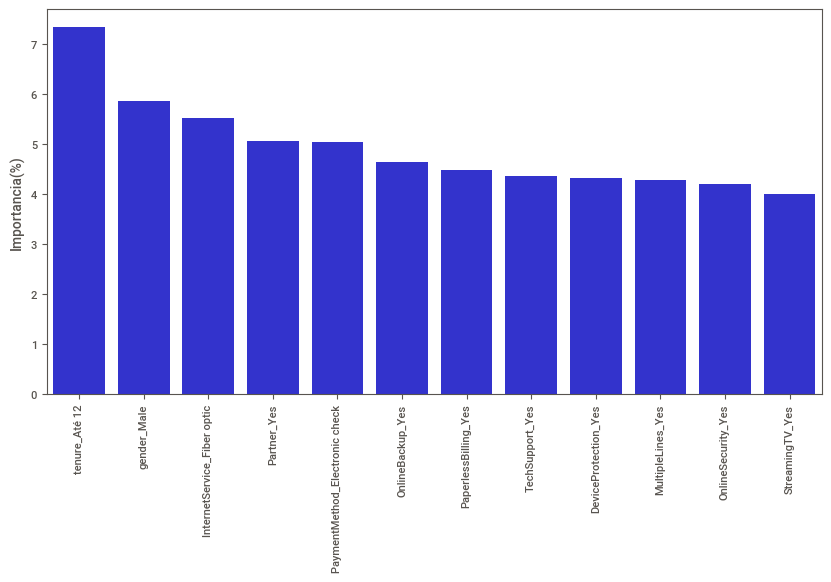

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=imp.index, y=imp['Importancia(%)'],color='blue',saturation=0.60)
plt.xticks(rotation=90);

In [49]:
# Tunagem de Hiperparâmetros
def Tunagem(modelo, X, y, parametros, tipo):

    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao,
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 20, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(X, y)

    #melhor = search.best_estimator_
    melhor = search.best_params_

    print(modelo)
    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

In [50]:
lista_de_modelos = [LogisticRegression(),
                    KNeighborsClassifier(),
                    RandomForestClassifier(),
                    XGBClassifier()
]

lista_de_parametros = [

  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
},
                        {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
},

  {'max_depth' : [2, 4, 6],
              'n_estimators': [50, 100, 150],
              'max_features': ['sqrt', 'auto'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 3, 5],
              'bootstrap': [True, False]
},
{
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}]


In [51]:

for i in range(len(lista_de_modelos)):
  tunagem = Tunagem(lista_de_modelos[i], X, y, lista_de_parametros[i], tipo = 'random')

Fitting 30 folds for each of 20 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(it

LogisticRegression()

Acuracia: 0.8028
Melhores parâmetros: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'C': 100}

Fitting 30 folds for each of 20 candidates, totalling 600 fits
KNeighborsClassifier()

Acuracia: 0.7786
Melhores parâmetros: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}

Fitting 30 folds for each of 20 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier()

Acuracia: 0.7933
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': True}

Fitting 30 folds for each of 20 candidates, totalling 600 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_sta

In [ ]:
# Predição
# Predict the probabilities of the test set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
proba = clf.predict_proba(X_test)

# Print the predicted probabilities
print(proba)


[[0.3749797  0.6250203 ]
 [0.90299684 0.09700316]
 [0.99232538 0.00767462]
 ...
 [0.93262439 0.06737561]
 [0.29698117 0.70301883]
 [0.75729173 0.24270827]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**6 - Conclusão**
#### O modelo que obteve a maior acurácia foi a Regressão Logística (0.8012). Seguido pelo Random Forest (arvs = 100, prof = 7) (0.7959) e Random Forest (arvs = 50, prof = 7) (0.7947).
#### As variáveis que possuem as maiores importâncias no modelo são: 'tenure_Até12', 'gender_Male', 'InternetService_Fiber optic'.

###**7 - Bibliografia**
1) https://www.kaggle.com/datasets/blastchar/telco-customer-churn

2) Scudilio, J. *Parte III: Como utilizar modelos de Machine Learning para reduzir o Churn.* https://www.flai.com.br/juscudilio parte-iii-como-utilizar-modelos-de-machine-learning-para-reduzir-o-churn/

3) 5a Competição_de_M_L_versao_final.ipynb

4) Script Aula 9 - Pré-processamendo de Dados_ Titanic Data.ipynb

5) Script Aula 10 - Tunagem de Hiperparâmetros.ipynb

6) Provost F., Fawcett T.(2016). *Data Science para Negócios*. 1a Ed. Alta Brooks.

7) Klosterman S. (2019). *Projetos de Ciência de Dados com Phyton*. 1a Ed. Novatec Editora.

8) Sharda R., Delen D., Turban E. (2019). *Business Intelligence e Análise de Dados para Gestão do Negócio*. 4a Ed. Bookman Companhia Editora Ltda.

9) Rocha R. *Dicas para Escrita de Cases em Data Science.*  https://www.flai.com.br/ricardo/dicas-para-escrita-de-cases-em-data-science/

10) Scudilio J. *Parte II: Como aplicar Machine Learning para reduzir o Churn.* https://www.flai.com.br/juscudilio/parte-ii-como-aplicar-machine-learning-para-reduzir-o-churn/

11) Amaral F. *Introdução à Ciência de Dados.* Alta Books, 2016